# Complexity Project

## 1 Implementation of the Oslo model.

### Task One

"Devise and perform some simple tests (e.g. by selecting particular simple values of p) to check whether your programme is working as intended. Document your tests in the project report"

In [3]:
import scipy as sp
import matplotlib.pyplot as plt
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The $oslo$ function which returns the final $z$ values and the final $h$ values which are worked out from the $z$ values and setting $h_{L+1} = 0$. The $\text{oslo_plot}$ function takes the output of the $oslo$ function and plots the heights.

In [4]:
def Oslo(L,p,n):
    
    #Initialisation
    z = sp.zeros(L)
    z_thresh = sp.zeros(L)
    n_grain = 0
    h_store = []

    def prob(p):
        if random.random() > p:
            return 1
            
        else:
            return 2
            
    def check_relax(z,z_thresh,L):
        relaxed = True
        for i in range(L):
            if z[i] > z_thresh[i]:
                relaxed = False
        return relaxed
    
    def h_generation(z):
        h = sp.zeros(L+1) #having the L+1 value as 0
        h[L] = 0
        for i in range(L-1,-1,-1):
            h[i] = z[i] + h[i+1]  
        return h
                
    for i in range(L):
        z_thresh[i] = prob(p)
    
    #Drive
    while n_grain < n:

        z[0] = z[0] + 1
        n_grain  = n_grain + 1
            
    #Relaxation
        while check_relax(z,z_thresh,L) == False:
        
            for i in range(L):

                if z[i] > z_thresh[i]: 

                    if i == 0:
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1

                    if i > 0 and i < (L -1):
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1 
                        z[i-1] = z[i-1] + 1
                        
                    if i == L - 1:
                        z[i] = z[i] - 1
                        z[i-1] = z[i-1] + 1
          
                    z_thresh[i] = prob(p)

        h_store.append(h_generation(z)[0])
                                
    h = h_generation(z)            
    return z , h , h_store , z_thresh

def Oslo_plot(oslo):
    L = len(oslo[1])
    L_plot = sp.linspace(0,
                         L-1,L) + 0.5
    h = oslo[1]
    plt.bar(L_plot,h, width = 1)
    plt.xlabel("Lattice Number")
    plt.ylabel("Height $h$")
    plt.title("Oslo Method")
    plt.savefig("osls_initial", dpi = 1000)
    plt.show()

Below is the result of the oslo_plot function

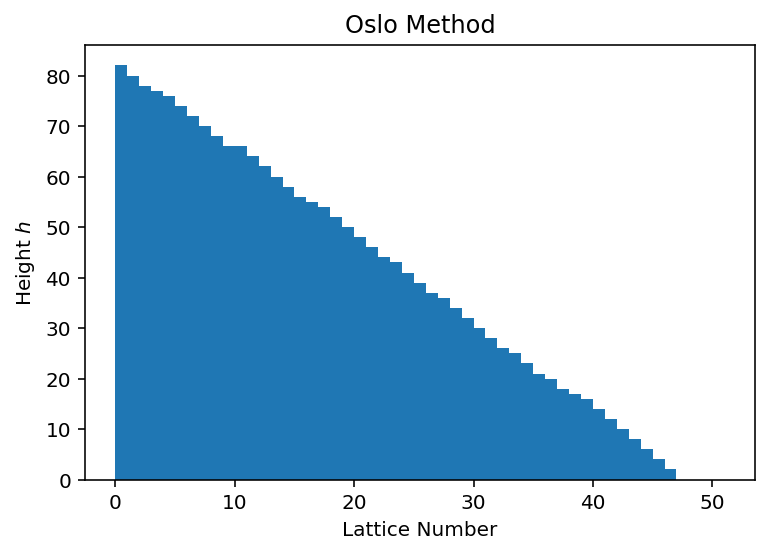

In [5]:
x = Oslo(50,0.5,2000)
Oslo_plot(x)

To test the function, the oslo_test function is used which returns the average height of the first entry after half the grains are added.


In [6]:
def Oslo_test(L,p,n):
    x = Oslo(L,p,n)
    Slice = int((7*n)/8)
    print("The mean of the steady state is ", "{:.1f}".format(sp.mean(x[2][Slice:n:1])), "for lattice size of", L)

Below are the results of the test. For size $L = 16$, the average height for the first site should be $26.5$, and for $L = 32$, the average height should be $53.9$.

In [7]:
Oslo_test(16,0.5,10000)
Oslo_test(32,0.5,10000)

The mean of the steady state is  26.7 for lattice size of 16
The mean of the steady state is  53.9 for lattice size of 32


## 2 The height of the pile $h(t; L)$
### Task 2a
"Starting from an empty system, measure the total height of the pile as a function of time t for the range of system sizes listed above. Plot the height h(t; L) vs. time t for the various system sizes in the same plot. Reflect upon the results obtained in terms of transient and recurrent configurations."
The height of the pile is given as the following:
<center>$h(t ; L)=\sum_{i=1}^{L} z_{i}(t)$</center>
The function $Oslo height$ returns a list of the heights for each time step. $Oslo height plot$ returns the plot, and $Oslo height list$ takes the first arguement as a list of the different $L$ sizes to be plotted and plots them on one graph. 

In [8]:
def Oslo_height(L,p,n):
    
    #Initialisation
    z = sp.zeros(L)
    z_thresh = sp.zeros(L)
    n_grain = 0
    height_store = []

    def prob(p):
        if random.random() > p:
            return 1
            
        else:
            return 2
            
    def check_relax(z,z_thresh,L):
        relaxed = True
        for i in range(L):
            if z[i] > z_thresh[i]:
                relaxed = False
        return relaxed
    
    def height(z_thresh):
        Sum = 0
        for i in range(L):
            Sum = Sum + z_thresh[i]
        return Sum
        
                
    for i in range(L):
        z_thresh[i] = prob(p)
    
    #Drive
    while n_grain < n:
        z[0] = z[0] + 1
        n_grain  = n_grain + 1
        height_store.append(height(z))     
    #Relaxation
        while check_relax(z,z_thresh,L) == False:
        
            for i in range(L):

                if z[i] > z_thresh[i]: 

                    if i == 0:
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1

                    if i > 0 and i < (L -1):
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1 
                        z[i-1] = z[i-1] + 1
                        
                    if i == L - 1:
                        z[i] = z[i] - 1
                        z[i-1] = z[i-1] + 1
          
                    z_thresh[i] = prob(p)
             
    return z , height_store

def Oslo_height_plot(L,p,n):
    x = Oslo_height(L,p,n)
    height = x[1]
    time = sp.linspace(0,n,n)
    plt.plot(time,height,label = L)
    plt.xlabel("Time")
    plt.ylabel("Height")
    plt.title("Height of pile as a function of Time")
    plt.legend()
    plt.show
    
def Oslo_height_plot_list(L_list,p,n,):
    for i in range(len(L_list)):
        Oslo_height_plot(L_list[i],p,n)

Below is the result of the different height time graphs. 

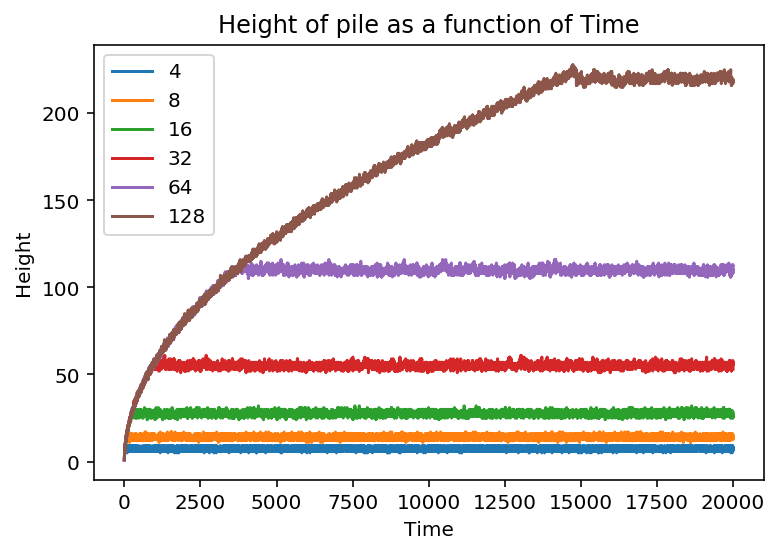

In [9]:
L_list = [4,8,16,32,64,128]
Oslo_height_plot_list(L_list,0.5,20000)

James :0 good luck on the work !!

### Task 2b
"By numerically measuring $t_c(L)$ as the number of grains in the system before an added grain induces a grain to leave the system for the first time, starting from an empty system, estimate the average of the cross-over time as $⟨t_c(L)⟩$. How does $⟨t_c(L)⟩$ scale with $L$ for $L ≫ 1$?"

Below $Oslo_t$ runs as $oslo$, but is more effcient because it will stop running as soon as the first grain leaves the system. $Oslo_t_average$ fucntion will take also the number of times to be average, and returns the average.

In [10]:
def Oslo_t(L,p,n):
    
    #Initialisation
    z = sp.zeros(L)
    z_thresh = sp.zeros(L)
    n_grain = 0
    h_store = []

    def prob(p):
        if random.random() > p:
            return 1
            
        else:
            return 2
            
    def check_relax(z,z_thresh,L):
        relaxed = True
        for i in range(L):
            if z[i] > z_thresh[i]:
                relaxed = False
        return relaxed
    
    def h_generation(z):
        h = sp.zeros(L+1) #having the L+1 value as 0
        h[L] = 0
        for i in range(L-1,-1,-1):
            h[i] = z[i] + h[i+1]  
        return h
                
    for i in range(L):
        z_thresh[i] = prob(p)
    
    #Drive
    while sum(h_generation(z)) == n_grain:

        z[0] = z[0] + 1
        n_grain  = n_grain + 1
            
    #Relaxation
        while check_relax(z,z_thresh,L) == False:
        
            for i in range(L):

                if z[i] > z_thresh[i]: 

                    if i == 0:
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1

                    if i > 0 and i < (L -1):
                        z[i] = z[i] - 2
                        z[i+1] = z[i+1] + 1 
                        z[i-1] = z[i-1] + 1
                        
                    if i == L - 1:
                        z[i] = z[i] - 1
                        z[i-1] = z[i-1] + 1
          
                    z_thresh[i] = prob(p)

        h_store.append(h_generation(z)[0])
                                
    h = h_generation(z) 
    return z , h , h_store , z_thresh , n_grain

def oslo_t_average(L,p,n,n_average):
    t_c  = [] 
    for i in range(n_average):
        t_c.append(Oslo_t(L,p,n)[4])
    average = sp.mean(t_c)
    return average
    

Below is the average height for 100 runs. 

In [11]:
x = oslo_t_average(20,0.5,1000,10)
print(r"Average $t_c$ is equal to", x) 
y = oslo_t_average(40,0.5,1000,10)
print(r"Average $t_c$ is equal to", y) 

Average $t_c$ is equal to 341.3
Average $t_c$ is equal to 1320.3


### Task 2c
"In this task, we are only interested in the scaling behaviour for $L ≫ 1$, that is, we may ignore potential corrections to scaling. Devise a theoretical argument to show that for a system of size $L$ in the steady state, you expect the average of the height of the pile over time to scale linearly with system size. Similarly, argue theoretically that the average of the cross-over time $⟨t_c(L)⟩$ for systems of linear size $L$ to reach the steady state (set of recurrent configurations) scales like $L^2$ for $L ≫ 1$."

The height of a pile as a function of time $t$ and size $L$ is

<center>$h(t ; L)=\sum_{i=1}^{L} z_{i}(t).$</center>

In a steady state, the summation to $L$ means that the height will scale linearly since if assume $z = <z>$ for a large system and we $\textbf{take the assumption that $z_i$ is independent}$, then height is simply given by 

<center>$h(t ; L)=L<z>,$</center>
from which the linear relationship is clear. 

$t_c$ is given by the following expression. 

<center>$t_c(L) = 􏰅\sum{z_i\dot i}$</center>

By the same argument as before, but since $i \proto L$, we can rewrite the experssion as:

<center>$t_c(L) = 􏰅kL^2$</center>,

from which is clear the $L^2$ relationship. 

### Task 2d
Guided by your answers to the two questions in TASK 2c, produce a data collapse for the processed height $h ̃(t; L)$ vs. time $t$ for the various system sizes. Explain carefully how you produced a data collapse and express that mathematically, in- troducing a scaling function $F: h ̃(t;L)$ = something $F(argument)$, identifying ‘something’ and the ‘argument’. How does the scaling function $F(x)$ behave for large arguments $x ≫ 1$ and for small arguments $x ≪ 1$ and why must it be so? From this result, obtain/predict how $h ̃(t; L)$ increases as a function of t during the transient.

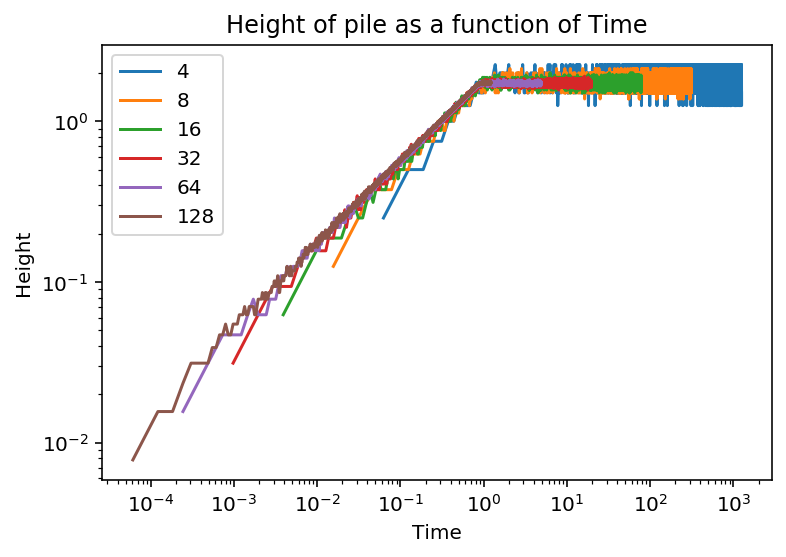

In [12]:
def Oslo_height_plot_collapse(L,p,n):
    x = Oslo_height(L,p,n)
    height = []
    for i in range(len(x[1])):
        height.append(x[1][i]/L)
    time = sp.linspace(1,n,n)/(L**2)
    
    plt.loglog(time,height,label = L)
    plt.xlabel("Time")
    plt.ylabel("Height")
    plt.title("Height of pile as a function of Time")
    plt.legend()
    plt.show
    
def Oslo_height_plot_list_collapse(L_list,p,n,):
    for i in range(len(L_list)):
        Oslo_height_plot_collapse(L_list[i],p,n)
        
L_list_collapse = [4,8,16,32,64,128]
Oslo_height_plot_list_collapse(L_list,0.5,20000)

### TASK 2e
"Now we consider the numerical data for the average height $⟨h(t; L)⟩_t$ carefully to investigate whether it contain signs of corrections to scaling. Assume the following form of the corrections to scaling $⟨h(t; L)⟩_t = a_0L (1 − a_1L^{−ω_1} + a_2L^{−ω_2} + . . .)$ where $ω_i > 0$ and ai are constants. Neglecting terms with $i > 1$, can you devise a procedure to estimate $a_0$ and $ω_1$ using your measured data?

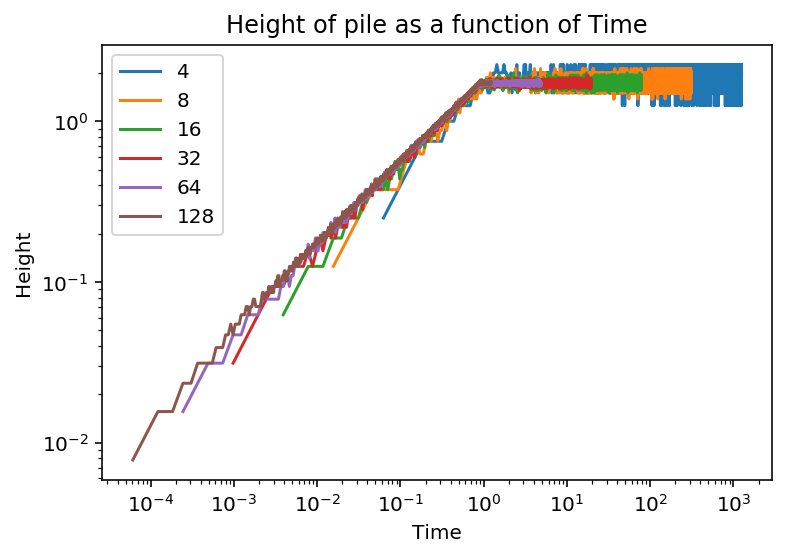

In [13]:
def Oslo_height_plot_collapse(L,p,n):
    x = Oslo_height(L,p,n)
    height = []
    for i in range(len(x[1])):
        height.append(x[1][i]/L)
    time = sp.linspace(1,n,n)/(L**2)
    
    plt.loglog(time,height,label = L)
    plt.xlabel("Time")
    plt.ylabel("Height")
    plt.title("Height of pile as a function of Time")
    plt.legend()
    plt.show
    
def Oslo_height_plot_list_collapse(L_list,p,n,):
    for i in range(len(L_list)):
        Oslo_height_plot_collapse(L_list[i],p,n)
        
L_list_collapse = [4,8,16,32,64,128]
Oslo_height_plot_list_collapse(L_list,0.5,20000)


"Now we consider the numerical data for the average height $⟨h(t; L)⟩_t$ carefully to investigate whether it contain signs of corrections to scaling. Assume the following form of the corrections to scaling $⟨h(t; L)⟩_t = a_0L (1 − a_1L^{−ω_1} + a_2L^{−ω_2} + . . .)$ where $ω_i > 0$ and ai are constants. Neglecting terms with $i > 1$, can you devise a procedure to estimate $a_0$ and $ω_1$ using your measured data?

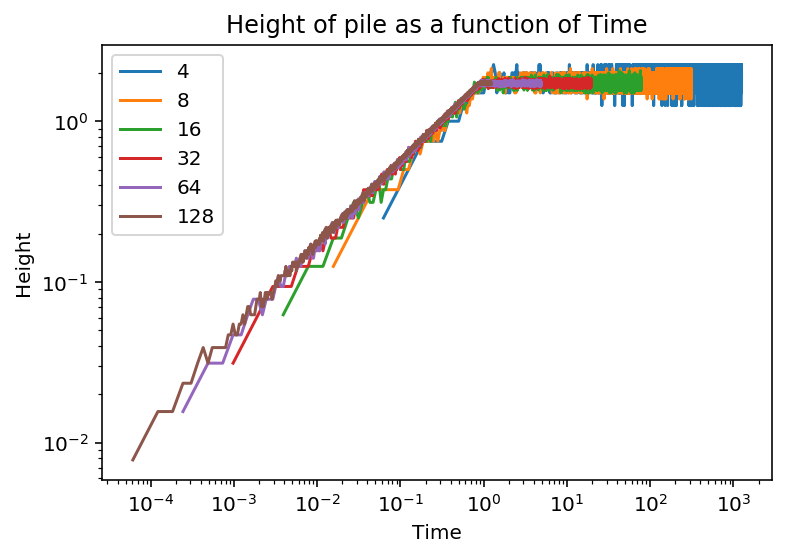

In [14]:
def Oslo_height_plot_collapse(L,p,n):
    x = Oslo_height(L,p,n)
    height = []
    for i in range(len(x[1])):
        height.append(x[1][i]/L)
    time = sp.linspace(1,n,n)/(L**2)
    
    plt.loglog(time,height,label = L)
    plt.xlabel("Time")
    plt.ylabel("Height")
    plt.title("Height of pile as a function of Time")
    plt.legend()
    plt.show
    
def Oslo_height_plot_list_collapse(L_list,p,n,):
    for i in range(len(L_list)):
        Oslo_height_plot_collapse(L_list[i],p,n)
        
L_list_collapse = [4,8,16,32,64,128]
Oslo_height_plot_list_collapse(L_list,0.5,20000)

### TASK 2e
"Now we consider the numerical data for the average height $⟨h(t; L)⟩_t$ carefully to investigate whether it contain signs of corrections to scaling. Assume the following form of the corrections to scaling $⟨h(t; L)⟩_t = a_0L (1 − a_1L^{−ω_1} + a_2L^{−ω_2} + . . .)$ where $ω_i > 0$ and ai are constants. Neglecting terms with $i > 1$, can you devise a procedure to estimate $a_0$ and $ω_1$ using your measured data?"

$⟨h(t; L)⟩_t = a_0L (1 − a_1L^{−ω_1})$

In [15]:
def oslo_t_average_list(List,p,n,n_average):
    t = []
    for i in range(len(List)):
        t.append(int(round(oslo_t_average(List[i],p,n,n_average))))
    return t
    print("t is")

def Oslo_height_list_t_c(L_list,p,n,n_average,t_c_list):
    height_t_c = []
    print("L_list is", L_list,"t_c_list",t_c_list)
    for i in range(len(L_list)):
        average = sp.average(Oslo_height(L_list[i],p,n)[1][t_c_list[i]:n:1])
        height_t_c.append(average)
    return height_t_c

def height_average_L_plot(L_list,p,n,n_average):
    t_c_list = oslo_t_average_list(L_list,p,n,n_average)
    height = Oslo_height_list_t_c(L_list,p,n,n_average,t_c_list)
    L = L_list
    
    print("height is", height)
    print("L is", L)
    
    plt.loglog(L,height/sp.array(L))
    plt.xlabel("L")
    plt.ylabel("Average Height for $t>t_c$")
    plt.grid()
    plt.show
    
    
L_list = [2,4,8,10,16,20,32,64,128]
        

In [295]:
L_list = [2,4,8,10,16,32,64,128]
p = 0.5
n = 100000
n_average = 10

t_c_list = oslo_t_average_list(L_list,p,n,n_average)
heights = Oslo_height_list_t_c(L_list,p,n,n_average,t_c_list)

L_list is [2, 4, 8, 10, 16, 32, 64, 128] t_c_list [6, 16, 59, 82, 208, 858, 3429, 13889]


[1.7204090758778259, 1.715322151560388, 1.7176098091041825, 1.7202428950714774]
a_0 is_ 1.7183959829034683


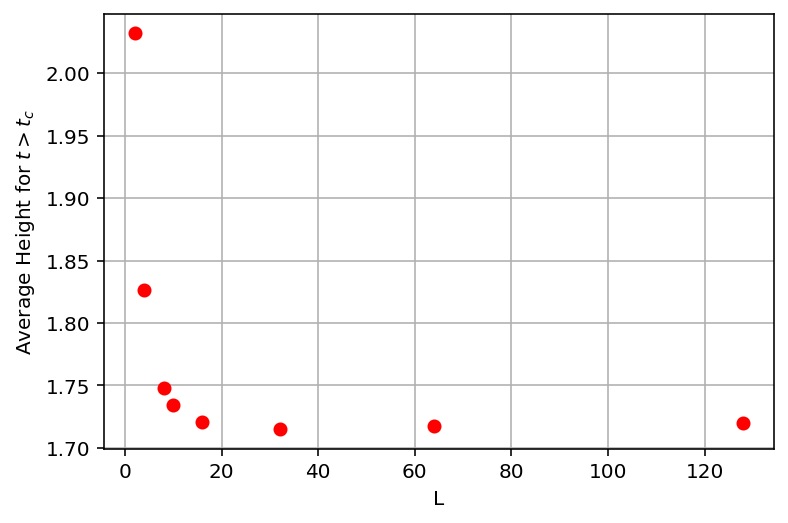

In [301]:
plt.plot(L_list,heights/sp.array(L_list), 'ro')
plt.xlabel("L")
plt.ylabel("Average Height for $t>t_c$")
plt.grid()

a = []
for i in range(4,len(L_list)):
    a.append(heights[i]/L_list[i])

print(a)
avg_a = sp.average(a)

print(r"a_0 is_", avg_a)

[2, 4, 8, 10, 16, 32, 64, 128]
[4.0633638018281095, 7.306339014242279, 13.984320749242054, 17.347615044336354, 27.526545214045214, 54.89030884993242, 109.92702778266768, 220.1910905691491]
scaled is [-0.18811807070997366, -0.06817821845647343, -0.022245668804243612, -0.014480411949494343, -0.006087178875921584, -0.003112369333560183, -0.0044501807626797785, -0.005989997117822998]
w_1 is equal to -0.9020981030829556


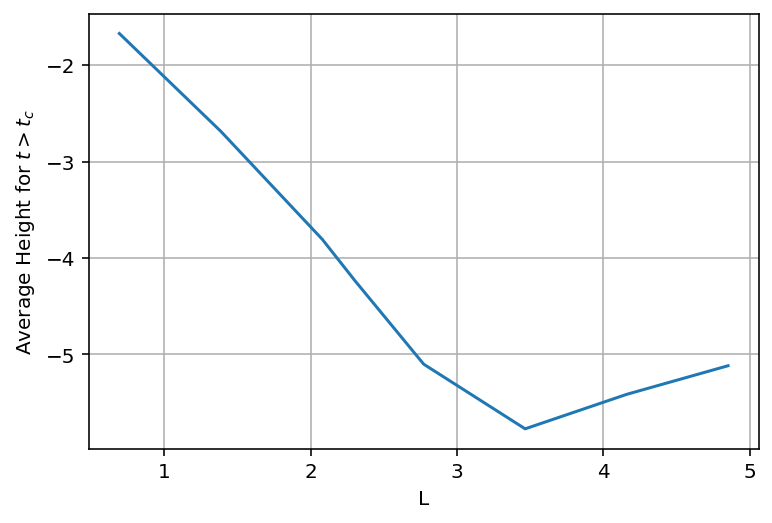

In [299]:
print(L_list)
print(heights)
scaled= []

for i in range(len(L_list)):
    scaled.append(1-(heights[i]/(1.71*(sp.array(L_list)[i]))))

print("scaled is", scaled)
plt.plot(sp.log(L_list),sp.log(scaled))
plt.xlabel("L")
plt.ylabel("Average Height for $t>t_c$")
plt.grid()

from scipy.optimize import curve_fit
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

popt, pcov = curve_fit(f, sp.log(L_list), sp.log(scaled)) # your data x, y to fit

print("w_1 is equal to", popt[0])








## 3 The avalanche-size probability P (s; L)


In [148]:
height_average_L_plot(L_list,0.5,100,10)

KeyboardInterrupt: 

TASK 2f [5 marks]: How does the standard deviation of the height σh(L) scale with system size? From your answers to TASKS 2e and 2f, can you predict what will happen with the average slope and its standard deviation in the limit of L → ∞?

In [69]:
for i in range(3,5):
    print(i)

3
4
